[[2005.]
 [2006.]
 [2007.]
 [2008.]
 [2009.]
 [2010.]
 [2011.]
 [2012.]
 [2013.]
 [2014.]
 [2015.]
 [2016.]
 [2017.]
 [2018.]
 [2019.]
 [2020.]
 [2021.]
 [2022.]]
[ 45.    48.    49.    52.5   58.5   67.5   81.   100.   115.2  132.
 150.   160.   173.   183.3  189.5  194.25 197.   215.  ]
house.csv
Enter the name of the area: rpgt_road 
You entered: rpgt_road 
Enter the units (per sq ft, per sq meter, per 100 sq meter): 1000
You entered units: 1000
1/1 [==============================] - 0s 47ms/step


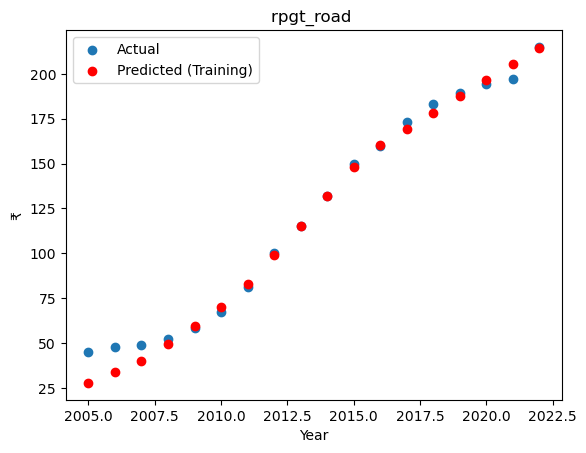

1/1 [==============================] - 0s 22ms/step


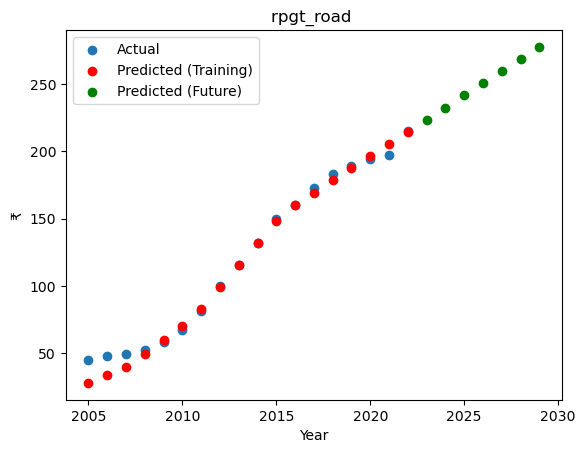

Predicted values:
Year 2023, Predicted Price: ₹223.621000
Year 2024, Predicted Price: ₹232.651000
Year 2025, Predicted Price: ₹241.691000
Year 2026, Predicted Price: ₹250.731000
Year 2027, Predicted Price: ₹259.751000
Year 2028, Predicted Price: ₹268.771000
Year 2029, Predicted Price: ₹277.781000


In [3]:
import pandas as pd
import tensorflow as tf
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

filePath = 'house.csv'
# filePath = 'sampleData2SaketKapra.csv'
df = pd.read_csv(filePath)
X = df[['TIME']].values.astype(float)
y = df['Value'].values.astype(float)
print(df[['TIME']].values.astype(float))
print(df['Value'].values.astype(float))

print(filePath)
area_name = input("Enter the name of the area: ")
print("You entered:", area_name)
units = input("Enter the units (per sq ft, per sq meter, per 100 sq meter): ")
print(f"You entered units: {units}")

scalerX = MinMaxScaler()
XScaled = scalerX.fit_transform(X)
scalerY = MinMaxScaler()
YScaled = scalerY.fit_transform(y.reshape(-1, 1))
model = tf.compat.v1.keras.Sequential([ 
    tf.compat.v1.keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    tf.compat.v1.keras.layers.Dense(32, activation='relu'),
    tf.compat.v1.keras.layers.Dense(1, activation='linear')
])
model.compile(optimizer=tf.compat.v1.train.AdamOptimizer(), loss='mean_squared_logarithmic_error')
model.fit(XScaled, YScaled, epochs=1000, verbose=0)
trainingPredictionsScaled = model.predict(XScaled)
trainingPredictions = scalerY.inverse_transform(trainingPredictionsScaled).flatten()
plt.scatter(df['TIME'], df['Value'].astype(float), label='Actual')
plt.scatter(df['TIME'], trainingPredictions, label='Predicted (Training)', color='red')
plt.xlabel('Year')
plt.ylabel('₹')
plt.title(area_name)
plt.legend()
plt.show()

futureYears = np.arange(2023, 2030).reshape(-1, 1)
futureYearsScaled = scalerX.transform(futureYears)
futureValuesScaled = model.predict(futureYearsScaled)
futureValues = scalerY.inverse_transform(futureValuesScaled).flatten()
plt.scatter(df['TIME'], df['Value'], label='Actual')
plt.scatter(df['TIME'], trainingPredictions, label='Predicted (Training)', color='red')
plt.scatter(futureYears.flatten(), futureValues, label='Predicted (Future)', color='green')
plt.xlabel('Year')
plt.ylabel('₹')
plt.title(area_name)
plt.legend()
plt.show()

print('Predicted values:')
for year, value in zip(futureYears.flatten(), futureValues):
    formatted_value = "{:.2f}".format(value)
    print(f'Year {year}, Predicted Price: ₹{formatted_value}{units}')